# **Feature Selection: Multual Information**

## **Code Setup**

Imports (packages/modules)

In [96]:
# General imports
# -----------------------------

import os
import sys
import random
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Specific imports
# -----------------------------

sys.path.append('./modules/')
import utils_v1 as utils

# linear algorithms
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# preprocessing
from sklearn.preprocessing import StandardScaler



Functions/Classes

In [97]:
# def foo(par):
#     ...

#     return result

Running configurations

In [98]:
# matplotlib
%matplotlib inline

# pandas display
pd.options.display.float_format = "{:,.3f}".format

# random number generators
seed = 17

# ignore warnings
warnings.filterwarnings("ignore")



Running parameters

In [99]:
# param = ['nb_name', 'exp_name', ['list_imgs'], 'path_out']
# nb_name: name of this notebook
# exp_name: name of the experiment
# path_out: path to save the results
# path_in: path of the input

#default
param = ['fsel-mi-v1',
        'PEI-mi',
        '../data/datasets/',
        '../data/datasets/raw-VOL-aggregate-v1_PEI-raw/raw-VOL-aggregate-v1_PEI-raw.csv',
        ]


In [100]:
nb_name = param[0]
exp_name = param[1]
exp_id = nb_name + '_' + exp_name
path_out = param[2] + exp_id + '/'
path_in = param[3]

print('nb_name=', nb_name)
print('exp_name=', exp_name)
print('path_out=', path_out)
print('path_in=', path_in)


nb_name= fsel-mi-v1
exp_name= PEI-raw
path_out= ../data/datasets/fsel-mi-v1_PEI-raw/
path_in= ../data/datasets/raw-VOL-aggregate-v1_PEI-raw/raw-VOL-aggregate-v1_PEI-raw.csv


Create output folder

In [101]:
# path to save outputs
utils.create_folder(path_out)


## **Dataset Preparation**

Load dataset

In [102]:
# df = pd.read_csv( path_in + dataset_name, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], header=None)

dataset = pd.read_csv( path_in, header=0, delimiter=',')
dataset



,-299.988,-285.034,-270.081,-255.127,-240.173,-225.22,-210.266,-195.313,-180.359,-165.405,...,686.951,701.904,716.858,731.812,746.765,761.719,776.672,791.626,matriz,class
0,0.805,0.539,0.413,0.332,0.272,0.216,0.166,0.109,0.051,0.004,...,4.155,4.486,4.810,5.146,5.482,5.819,6.149,6.473,Saliva,0
1,0.427,0.106,-0.012,-0.060,-0.080,-0.089,-0.094,-0.101,-0.103,-0.093,...,3.142,3.512,3.922,4.363,4.843,5.348,5.867,6.378,Saliva,0
2,0.231,-0.034,-0.132,-0.179,-0.203,-0.223,-0.236,-0.242,-0.235,-0.201,...,3.191,3.569,3.977,4.418,4.884,5.375,5.871,6.356,Saliva,0
3,1.236,0.871,0.700,0.590,0.511,0.439,0.369,0.288,0.202,0.122,...,4.889,5.277,5.671,6.071,6.474,6.873,7.270,7.652,Saliva,0
4,0.423,0.059,-0.069,-0.123,-0.144,-0.158,-0.168,-0.184,-0.194,-0.197,...,3.801,4.242,4.720,5.234,5.785,6.364,6.954,7.542,Saliva,0
5,0.345,-0.020,-0.138,-0.182,-0.190,-0.195,-0.194,-0.199,-0.203,-0.198,...,2.547,2.899,3.293,3.743,4.245,4.798,5.391,6.015,Saliva,0
6,0.420,0.086,-0.021,-0.055,-0.059,-0.056,-0.053,-0.060,-0.064,-0.061,...,2.093,2.383,2.719,3.106,3.546,4.049,4.605,5.203,Saliva,0
7,1.120,0.759,0.597,0.502,0.440,0.387,0.331,0.258,0.172,0.081,...,4.797,5.184,5.567,5.960,6.343,6.727,7.104,7.460,Saliva,0
8,0.540,0.178,0.059,0.015,-0.002,-0.014,-0.028,-0.049,-0.070,-0.069,...,3.858,4.294,4.764,5.267,5.801,6.353,6.917,7.469,Saliva,0
9,0.324,-0.014,-0.115,-0.142,-0.140,-0.135,-0.133,-0.146,-0.158,-0.155,...,2.863,3.216,3.609,4.057,4.553,5.096,5.678,6.281,Saliva,0


Data selection

In [103]:
# parameter
target = 'class'
data_agg = 0

dataset_original = dataset.copy()

# dataset selection (when dataset is very big)
# -----------------------
# dataset = dataset.groupby(target).sample(frac=0.1, random_state=seed)

# columns selection
# -----------------------
if data_agg == 1:
    exclude = -2
else:
    exclude = -1

features = dataset.columns.tolist()[:exclude]
dataset = dataset[features + [target]]

# rows selection
# -----------------------
# exclude one label
# dataset = dataset.loc[dataset[target] != 2]

# binary one-vs-one (OVO)
# dataset = pd.concat([dataset.loc[dataset[target] == 0], dataset.loc[dataset[target] == 10]], ignore_index=True) 

# binary one-vs-rest (OVR)
# label_one = 0
# dataset.loc[dataset[target] != label_one, target] = 1

# multi
# dataset = dataset

dataset


,-299.988,-285.034,-270.081,-255.127,-240.173,-225.22,-210.266,-195.313,-180.359,-165.405,...,671.997,686.951,701.904,716.858,731.812,746.765,761.719,776.672,791.626,class
0,0.805,0.539,0.413,0.332,0.272,0.216,0.166,0.109,0.051,0.004,...,3.828,4.155,4.486,4.810,5.146,5.482,5.819,6.149,6.473,0
1,0.427,0.106,-0.012,-0.060,-0.080,-0.089,-0.094,-0.101,-0.103,-0.093,...,2.799,3.142,3.512,3.922,4.363,4.843,5.348,5.867,6.378,0
2,0.231,-0.034,-0.132,-0.179,-0.203,-0.223,-0.236,-0.242,-0.235,-0.201,...,2.844,3.191,3.569,3.977,4.418,4.884,5.375,5.871,6.356,0
3,1.236,0.871,0.700,0.590,0.511,0.439,0.369,0.288,0.202,0.122,...,4.501,4.889,5.277,5.671,6.071,6.474,6.873,7.270,7.652,0
4,0.423,0.059,-0.069,-0.123,-0.144,-0.158,-0.168,-0.184,-0.194,-0.197,...,3.390,3.801,4.242,4.720,5.234,5.785,6.364,6.954,7.542,0
5,0.345,-0.020,-0.138,-0.182,-0.190,-0.195,-0.194,-0.199,-0.203,-0.198,...,2.228,2.547,2.899,3.293,3.743,4.245,4.798,5.391,6.015,0
6,0.420,0.086,-0.021,-0.055,-0.059,-0.056,-0.053,-0.060,-0.064,-0.061,...,1.831,2.093,2.383,2.719,3.106,3.546,4.049,4.605,5.203,0
7,1.120,0.759,0.597,0.502,0.440,0.387,0.331,0.258,0.172,0.081,...,4.411,4.797,5.184,5.567,5.960,6.343,6.727,7.104,7.460,0
8,0.540,0.178,0.059,0.015,-0.002,-0.014,-0.028,-0.049,-0.070,-0.069,...,3.450,3.858,4.294,4.764,5.267,5.801,6.353,6.917,7.469,0
9,0.324,-0.014,-0.115,-0.142,-0.140,-0.135,-0.133,-0.146,-0.158,-0.155,...,2.547,2.863,3.216,3.609,4.057,4.553,5.096,5.678,6.281,0


Data preparation

In [104]:
# # parameters
# feat = feat_all
# target = target_multi

# # select and prepare the dataset
# dataset.replace({target[0]: {'no': 0, 'yes': 1}}, inplace=True)
# dataset.replace({target[0]: {'control': 0, 'cavity': 1, 'floor': 2}}, inplace=True)



## **Feature Selection**

Split features and labels

In [105]:
x = dataset.iloc[:, :-1].values
y = np.ravel(dataset[[target]].values)
labels = np.unique(y).tolist()

print('x shape:', x.shape)
print('y shape:', y.shape)
print('labels:', labels)


x shape: (40, 74)
y shape: (40,)
labels: [0, 1]


Compute scores

Text(0.5, 0, 'Score')

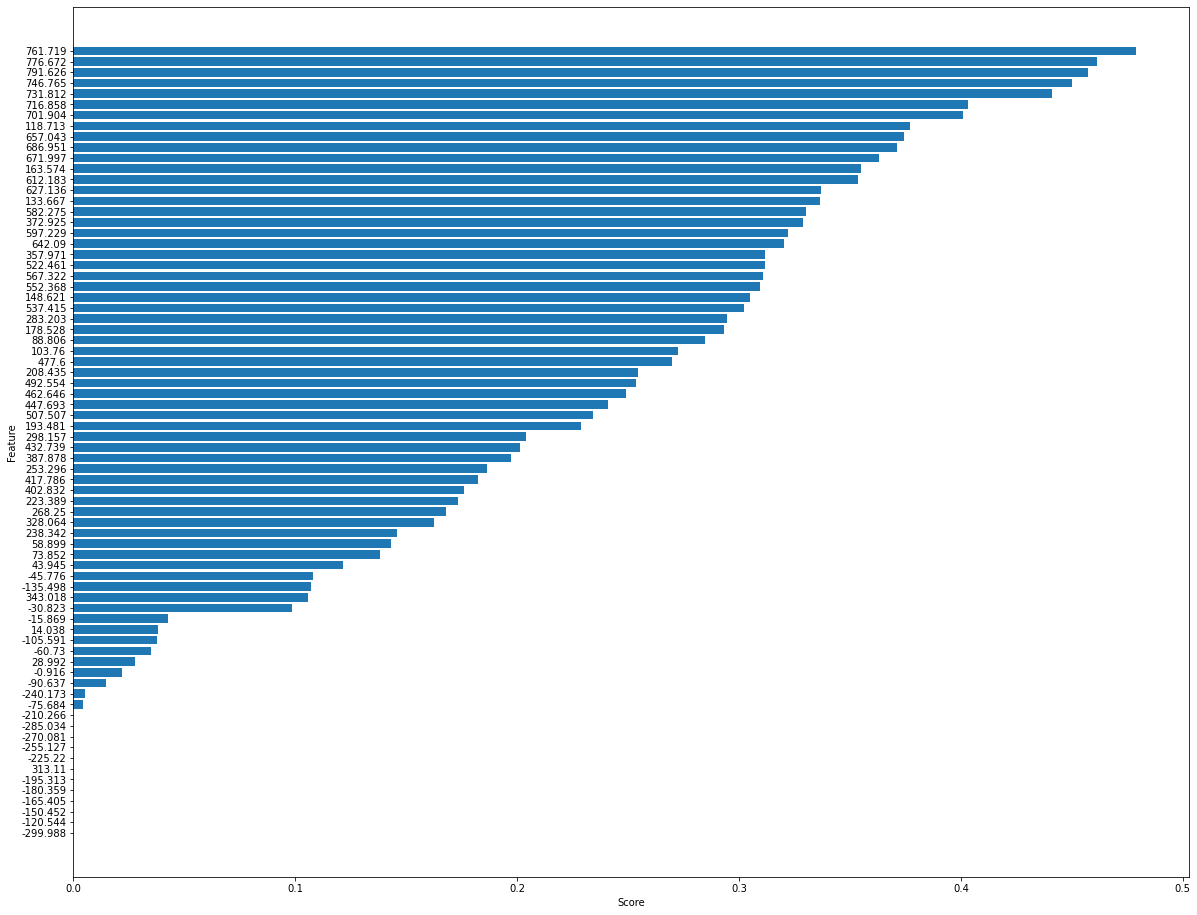

In [106]:
estimator_score = mutual_info_classif(x, y, random_state=seed)
# estimator_score = f_classif(x, y)

sorted_idx = np.argsort(estimator_score)

estimator_score_df = pd.DataFrame(estimator_score[sorted_idx[::-1]], index=dataset.columns[sorted_idx[::-1]], columns=['score'])

plt.figure(figsize=(20,16))
plt.barh(dataset.columns[sorted_idx], estimator_score[sorted_idx])
plt.ylabel('Feature')
plt.xlabel("Score")

In [107]:
estimator_score_df

,score
761.719,0.479
776.672,0.461
791.626,0.457
746.765,0.450
731.812,0.441
...,...
-180.359,0.000
-165.405,0.000
-150.452,0.000
-120.544,0.000


Statistics of the scores

In [108]:
estimator_score_df.describe()

,score
count,74.000
mean,0.200
std,0.149
min,0.000
25%,0.038
50%,0.202
75%,0.318
max,0.479


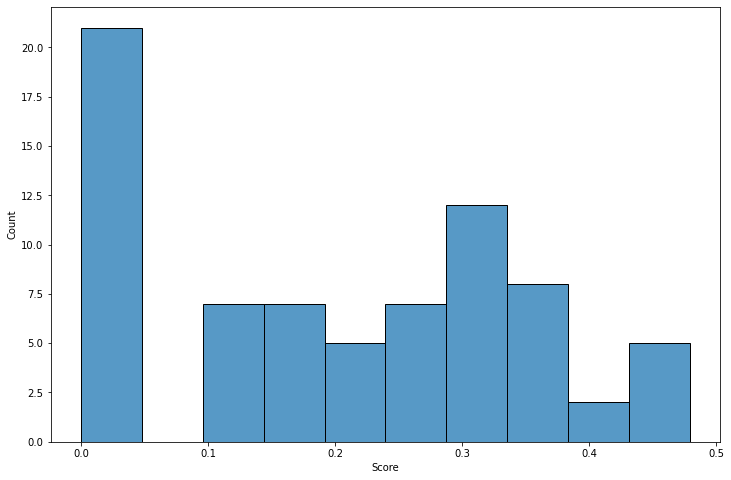

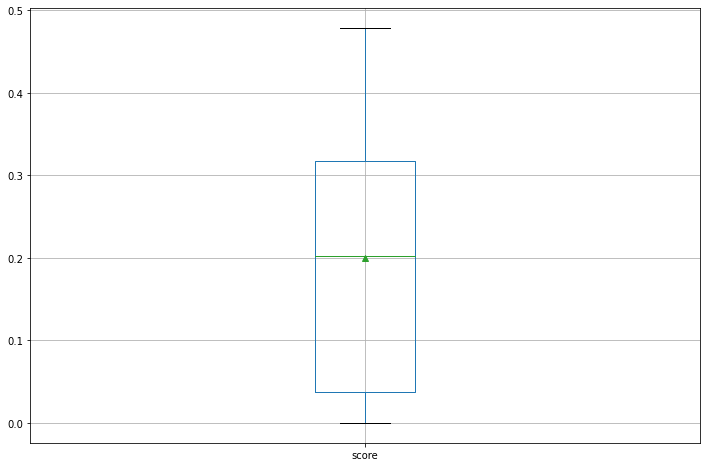

In [109]:
from  matplotlib.ticker import FuncFormatter

# plot the estimated performance distribution of the scores

# histogram
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(data=estimator_score_df, x='score', stat='count', bins=10)
# mi_score_df.hist(legend=False, ax=axes)
# axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
axes.set_xlabel('Score')
axes.set_ylabel('Count')
plt.show

# boxplot
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
estimator_score_df.boxplot(showmeans=True)
plt.show()

Save the k_best features

In [110]:
k_best = 5
fsel = estimator_score_df.iloc[:k_best, :].index
fsel

Index(['761.719', '776.672', '791.626', '746.765', '731.812'], dtype='object')

In [111]:
# quartil_3 = 0.318
# mi_score_df.loc[mi_score_df['mi_score'] >= quartil_3]

dataset_fsel = pd.concat([dataset_original.loc[:, fsel.tolist()], dataset_original.iloc[:, exclude:]], axis=1)
dataset_fsel.to_csv(path_out + exp_id + '.csv', index=False, float_format='%.3f')

dataset_fsel

,761.719,776.672,791.626,746.765,731.812,matriz,class
0,5.819,6.149,6.473,5.482,5.146,Saliva,0
1,5.348,5.867,6.378,4.843,4.363,Saliva,0
2,5.375,5.871,6.356,4.884,4.418,Saliva,0
3,6.873,7.270,7.652,6.474,6.071,Saliva,0
4,6.364,6.954,7.542,5.785,5.234,Saliva,0
5,4.798,5.391,6.015,4.245,3.743,Saliva,0
6,4.049,4.605,5.203,3.546,3.106,Saliva,0
7,6.727,7.104,7.460,6.343,5.960,Saliva,0
8,6.353,6.917,7.469,5.801,5.267,Saliva,0
9,5.096,5.678,6.281,4.553,4.057,Saliva,0
